In [91]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import ipywidgets as widgets


In [94]:
from_date = widgets.DatePicker()
to_date = widgets.DatePicker()
print('From date:')
display(from_date)
print('To date:')
display(to_date)

From date:


DatePicker(value=None)

To date:


DatePicker(value=None)

In [95]:
url = f"https://api.energidataservice.dk/dataset/Elspotprices/download?format=XL&offset=0&start={from_date.value}T00:00&end={to_date.value}T00:00&filter=%7B%22PriceArea%22:%22DK2%22%7D&sort=HourUTC%20DESC&timezone=utc"
df = pd.read_excel(url)
df['dt'] = df.HourDK.dt.date
df['h'] = df.HourDK.dt.hour
df.head()

,HourUTC,HourDK,PriceArea,SpotPriceDKK,SpotPriceEUR,dt,h
0,2022-09-12 21:00:00,2022-09-12 23:00:00,DK2,2542.629883,341.959991,2022-09-12,23
1,2022-09-12 20:00:00,2022-09-12 22:00:00,DK2,2743.679932,369.000000,2022-09-12,22
2,2022-09-12 19:00:00,2022-09-12 21:00:00,DK2,3296.209961,443.309998,2022-09-12,21
3,2022-09-12 18:00:00,2022-09-12 20:00:00,DK2,3834.020020,515.640015,2022-09-12,20
4,2022-09-12 17:00:00,2022-09-12 19:00:00,DK2,4019.909912,540.640015,2022-09-12,19


In [96]:
def spot_heatmap(df):
    dates = sorted(df.dt.unique())
    df_plot = pd.DataFrame(index=sorted(df.h.unique()))
    for date in dates:
        dt_col = date.isoformat().replace('-', '_')
        df_sub = df[df.dt == date].set_index('h').SpotPriceDKK.to_frame(dt_col)
        df_sub[dt_col] = df_sub[dt_col] / 1000.0
        df_plot = df_plot.join(df_sub)
    sns.heatmap(df_plot, annot=True, cmap='RdYlGn_r', fmt='.3g')
    plt.show()

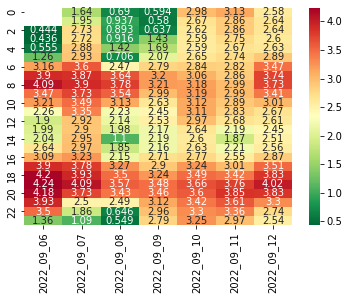

In [97]:
spot_heatmap(df)